In [2]:
#Der importeres nødvendige pakker:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 13-month smoothed monthly total sunspot number 1-1749 to now

In [3]:
#Dataet hentes
Rådata = np.genfromtxt('13-month smoothed monthly total sunspot number 1-1749 to now.csv', delimiter=';')

#År og solpletantal hentes, hvor de yderste datapunkter er fjernet, da disse ikke giver noget betydningsfuldt endnu:
Dato_brøkdel = Rådata[6:-6,2]
Monthly_smoothed_sunspot_number = Rådata[6:-6,3]

#Minimum
Proxy_minimum_dato = np.array([1755+2/13 , 1766+6/13 , 1775+6/13 , 1784+9/13 , 1798+4/13 , 1810+7/13 , 1823+5/13 , 1833+11/13 , 1843+7/13, 1855+12/13,
                    1867+3/13 , 1878+12/13 , 1890+3/13 , 1902+1/13 , 1913+7/13 , 1923+8/13 , 1933+9/13 , 1944+2/13 , 1954+4/13 , 1964+10/12,
                    1976+3/13 , 1986+9/13 , 1996+8/13 , 2008+12/13 , 2019+12/13])

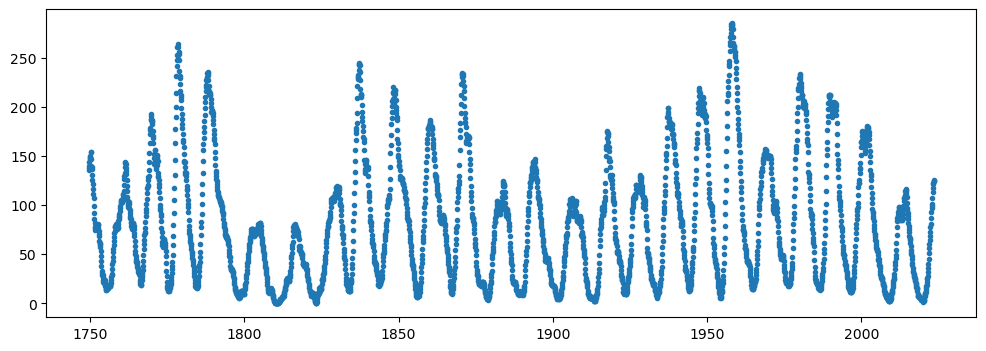

In [4]:
plt.figure(figsize=(12,4))
plt.plot(Dato_brøkdel , Monthly_smoothed_sunspot_number,'.')


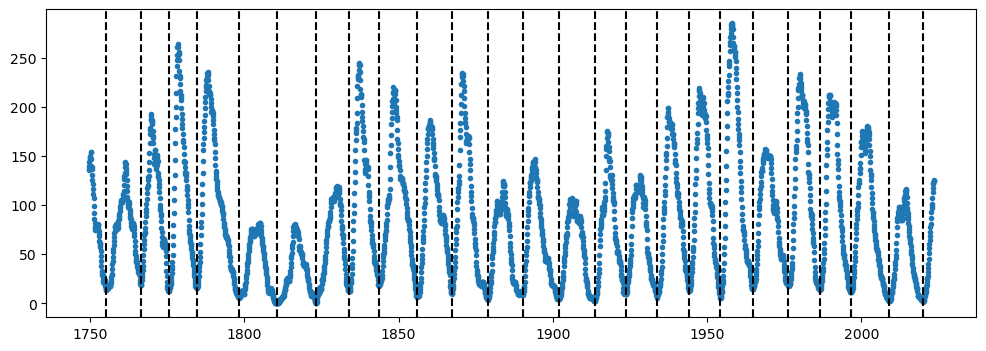

In [5]:
plt.figure(figsize=(12,4))
plt.plot(Dato_brøkdel , Monthly_smoothed_sunspot_number,'.')
for x in Proxy_minimum_dato:
    plt.axvline(x, color='black', linestyle='dashed')

# Opdeler cyklerne

In [6]:
Cykler = []
for k in range( len(Proxy_minimum_dato)-1 ):
    Maske=(Proxy_minimum_dato[k] < Dato_brøkdel) & (Dato_brøkdel < Proxy_minimum_dato[k+1])
    x = Dato_brøkdel[Maske]
    y = Monthly_smoothed_sunspot_number[Maske]
    Cykler.append([x,y])
    if k == 23:
        Maske=(Cykler[23][0][-1] < Dato_brøkdel) & (Dato_brøkdel < 2025)
        x = Dato_brøkdel[Maske]
        y = Monthly_smoothed_sunspot_number[Maske]
        Cykler.append([x,y])

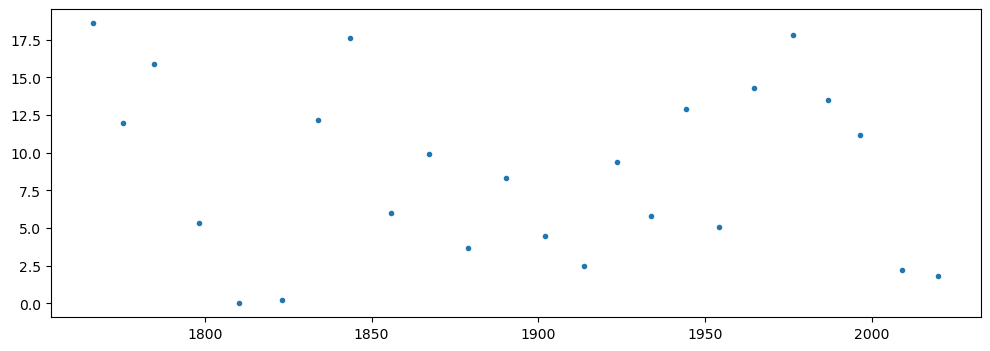

In [10]:
# for n in range( len(Cykler) ):
#     Maximum.append( [Cykler[n][0][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ] ,
#                     Cykler[n][1][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ]]  )

# Maximum_dato = np.array([])
# Maximum_plet = np.array([])

# for n in range( len(Cykler) ):
#     Maximum_dato = np.append( Cykler[n][0][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ] , Maximum_dato)
#     Maximum_plet = np.append(Cykler[n][1][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ] , Maximum_plet)

# Minimum_dato = []
# Minimum_plet = []

# for n in range( len(Cykler_max) ):
#     Minimum_dato.append( Cykler_max[n][0][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ])
#     Minimum_plet.append(Cykler_max[n][1][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ] )


# Minimum_dato = np.array([])
# Minimum_plet = np.array([])

# for n in range( len(Cykler_max) ):
#     Minimum_dato = np.append( Cykler_max[n][0][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ] , Minimum_dato)
#     Minimum_plet = np.append(Cykler_max[n][1][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ] , Minimum_plet)

Maximum_dato = []
Maximum_plet = []

for n in range( len(Cykler) ):
    Maximum_dato.append( Cykler[n][0][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ])
    Maximum_plet.append(Cykler[n][1][ np.where(Cykler[n][1] == np.max(Cykler[n][1]))[0][0] ] )


Cykler_max = []
for k in range( len(Maximum_dato)-1 ):
    Maske=(Maximum_dato[k] < Dato_brøkdel) & (Dato_brøkdel < Maximum_dato[k+1])
    x = Dato_brøkdel[Maske]
    y = Monthly_smoothed_sunspot_number[Maske]
    Cykler_max.append([x,y])



Minimum_dato = []
Minimum_plet = []

for n in range( len(Cykler_max) ):
    Minimum_dato.append( Cykler_max[n][0][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ])
    Minimum_plet.append(Cykler_max[n][1][ np.where(Cykler_max[n][1] == np.min(Cykler_max[n][1]))[0][0] ] )

plt.figure(figsize=(12,4))
plt.plot(Minimum_dato , Minimum_plet , '.')



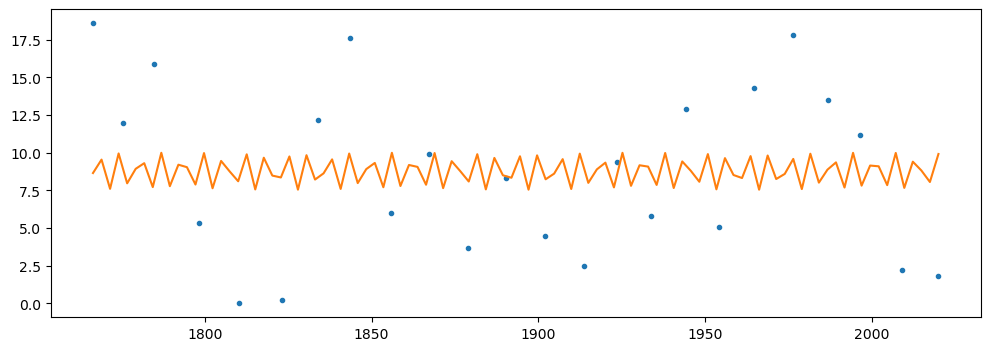

In [12]:
def sin(x,a,b,c):
    return a*np.sin(x*b)+c

lin_var,cov_l = curve_fit(sin , Minimum_dato , Minimum_plet,p0=[9,100])

x=np.linspace(Minimum_dato[0] , Minimum_dato[-1] , 100)
y=sin(x,*lin_var)
plt.figure(figsize=(12,4))

plt.plot(Minimum_dato , Minimum_plet , '.')
plt.plot(x,y)